In [2]:
df = pd.read_csv('/Users/03000070/Downloads/day.csv')

In [3]:
df.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [35]:

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score

df1 = df.drop(['instant','holiday'],1)

X = df1.drop(['cnt'],1)
y = df1['cnt']

X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.3, random_state = 42)

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)


y_pred = lin_reg.predict(X_test)

r2_score(y_test,y_pred)

1.0

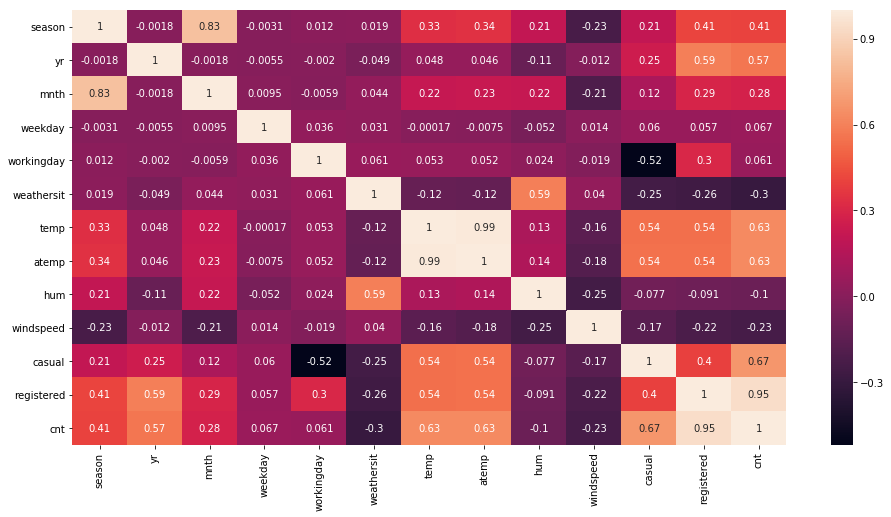

In [48]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score

import seaborn as sns
import matplotlib.pyplot as plt


df1 = df.drop(['instant','holiday'],1)
plt.figure(figsize=(16,8))
sns.heatmap(df1.corr(),annot=True)



In [37]:
# scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [98]:
cols = list(df1.columns.values)
df1 = scaler.fit_transform(df1)
df1 = pd.DataFrame(df1)
df1.columns = cols

In [50]:
cols
# plt.figure(figsize=(16,7))
# sns.heatmap(df1.corr(),annot=True)

['season',
 'yr',
 'mnth',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt']

In [51]:
df1.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,0.0,0.0,0.0,1.000000,0.0,0.5,0.355170,0.373517,0.828620,0.284606,0.096538,0.091539,0.110792
1,0.0,0.0,0.0,0.000000,0.0,0.5,0.379232,0.360541,0.715771,0.466215,0.037852,0.093849,0.089623
2,0.0,0.0,0.0,0.166667,1.0,0.0,0.171000,0.144830,0.449638,0.465740,0.034624,0.174560,0.152669
3,0.0,0.0,0.0,0.333333,1.0,0.0,0.175530,0.174649,0.607131,0.284297,0.031103,0.207046,0.177174
4,0.0,0.0,0.0,0.500000,1.0,0.0,0.209120,0.197158,0.449313,0.339143,0.023474,0.216286,0.181546


In [43]:
from platform import python_version
print(python_version())

3.7.3


In [56]:
X = df1.drop(['cnt'],1)
y = df1['cnt']

X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.3, random_state = 42)

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)


y_pred = lin_reg.predict(X_test)

r2_score(y_test,y_pred)

1.0

In [54]:
list(df1)

['season',
 'yr',
 'mnth',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt']

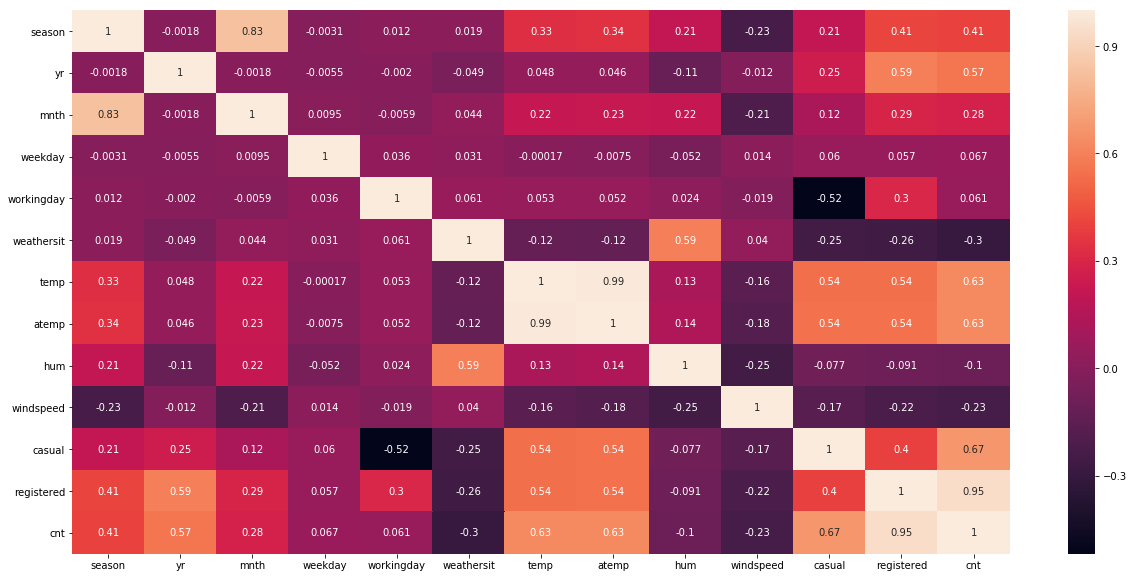

In [70]:
#pearson heat map
plt.figure(figsize=(21,10))
sns.heatmap(df1.corr(),annot=True)

In [87]:
X = X[['registered']]

In [88]:
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.3, random_state = 42)

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)


y_pred = lin_reg.predict(X_test)

r2_score(y_test,y_pred)

0.9161130012498736

In [104]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [90]:
X = sm.add_constant(X)

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [107]:
# model = sm.OLS(y,X).fit()
model_1 = smf.ols(formula='registered',data=df1).fit()

PatsyError: model is missing required outcome variables

In [92]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     6149.
Date:                Sun, 14 Jul 2019   Prob (F-statistic):               0.00
Time:                        13:16:05   Log-Likelihood:                 880.90
No. Observations:                 731   AIC:                            -1758.
Df Residuals:                     729   BIC:                            -1749.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0246      0.007      3.607      0.000       0.011       0.038
registered     0.9354      0.012     78.412      0.000       0.912       0.959
==============================================================================
Omnibus:                      193.736   Durbin-Watson:                   0.932
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              384.339
Skew:                           1.525   Prob(JB):                     3.48e-84
Kurtosis:                       4.822   Cond. No.                         5.72
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [108]:
from sklearn.linear_model import Ridge

In [112]:
ridge = Ridge(alpha=20)

In [113]:
ridge.fit(X_train,y_train)

Ridge(alpha=20, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [114]:
ridge.score(X_test,y_test)

0.7308997945242235

In [118]:
from sklearn.datasets import load_boston

In [124]:
data = load_boston()

In [125]:
data.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [121]:
import pandas as pd

In [130]:
df = pd.DataFrame(data.data)
cols = list(data.feature_names)
df.columns = cols
df["MEDV"] = data.target

In [131]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


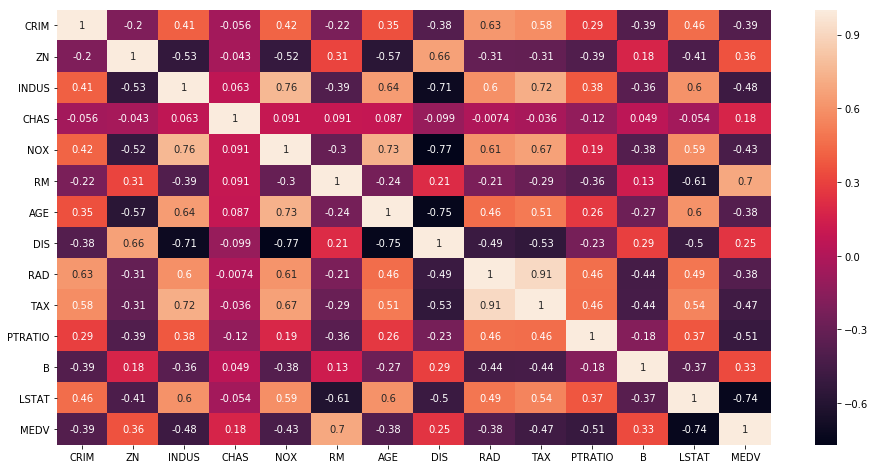

In [134]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import cross_val_score

from sklearn.metrics import r2_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsRegressor

import statsmodels.api as sm
import statsmodels.formula.api as smf


plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True)


In [137]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

cols = list(df)


In [138]:
cols

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'MEDV']

In [139]:
df1 = scaler.fit_transform(df)
df1 = pd.DataFrame(df1)
df1.columns = cols

In [141]:
df1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,0.631111
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,0.693333


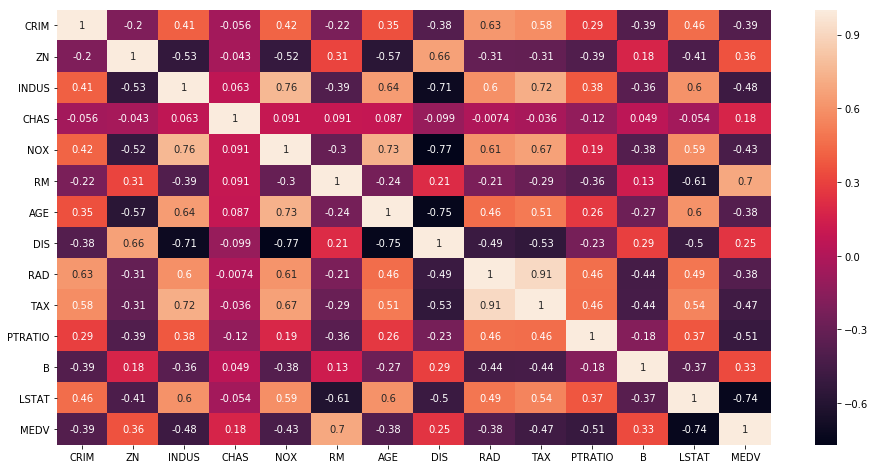

In [142]:

plt.figure(figsize=(16,8))
sns.heatmap(df1.corr(),annot=True)

In [145]:
df1.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [149]:
X = df1.drop(['MEDV'],1)
y = df1['MEDV']

X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.3, random_state = 42)

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)


y_pred = lin_reg.predict(X_test)

r2_score(y_test,y_pred)

0.7112260057484925

In [162]:
X = df[['RM','LSTAT','PTRATIO']]

In [164]:
y = df[['MEDV']]

In [165]:
model = sm.OLS(y,X).fit()

In [167]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     3335.
Date:                Sun, 14 Jul 2019   Prob (F-statistic):               0.00
Time:                        14:52:10   Log-Likelihood:                -1564.1
No. Observations:                 506   AIC:                             3134.
Df Residuals:                     503   BIC:                             3147.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             6.2433      0.225     27.692      0.000       5.800       6.686
LSTAT         -0.4919      0.040    -12.439      0.000      -0.570      -0.414
PTRATIO       -0.5714      0.092     -6.215      0.000      -0.752      -0.391
==============================================================================
Omnibus:                      196.409   Durbin-Watson:                   0.888
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1133.974
Skew:                           1.593   Prob(JB):                    5.76e-247
Kurtosis:                       9.606   Cond. No.                         24.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [175]:
model = smf.ols(formula='RM~LSTAT', data=df).fit()

In [177]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     RM   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     304.7
Date:                Sun, 14 Jul 2019   Prob (F-statistic):           1.03e-53
Time:                        15:00:43   Log-Likelihood:                -419.27
No. Observations:                 506   AIC:                             842.5
Df Residuals:                     504   BIC:                             851.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0488      0.050    140.253      0.000       6.950       7.148
LSTAT         -0.0604      0.003    -17.455      0.000      -0.067      -0.054
==============================================================================
Omnibus:                       46.982   Durbin-Watson:                   1.240
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              217.735
Skew:                           0.211   Prob(JB):                     5.24e-48
Kurtosis:                       6.186   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [184]:
from sklearn.feature_selection import RFE
X = df.drop(['MEDV'],1)
y = df['MEDV']

In [185]:
lin_reg = LinearRegression()

In [186]:
rfe = RFE(lin_reg,4)

In [187]:
fit = rfe.fit(X,y)

In [192]:
print('Number Features : %s ' %(fit.n_features_))

Number Features : 4 


In [193]:
print('Features Support : %s ' %(fit.support_))

Features Support : [False False False  True  True  True False False False False  True False
 False] 


In [194]:
print('Features Ranking : %s' %(fit.ranking_))

Features Ranking : [ 5  7  6  1  1  1 10  2  4  8  1  9  3]


In [195]:
# wine datasets 

